In [46]:
import argparse

import torch
import uuid

import numpy as np

from torch_geometric.nn import Node2Vec
from torch_geometric.utils import erdos_renyi_graph

import os
import csv

import gph
import gtda
from gtda import diagrams
from gtda import homology

import matplotlib.pyplot as plt

import sys
# appending a path
sys.path.append('../rawos')
import metrics
from sklearn.metrics import pairwise_distances
import scipy
from scipy import special
from scipy.stats import pearsonr



In [93]:
def jensenshannon_distance(filename1, filename2):
    """Computes the Jensen-Shanon distance of two embeddings of the same number of points"""
    
    X= np.loadtxt(filename1, delimiter="\t")
    diamx = metrics.diameter(X)
    X= X/diamx
    
    Y= np.loadtxt(filename2, delimiter="\t")
    diamy = metrics.diameter(Y)
    Y= Y/diamy
    
    dX = pairwise_distances(X, metric='euclidean')
    dY = pairwise_distances(Y, metric='euclidean')

    DX = []
    DY = []
    for i in range(X.shape[0]): 
        for j in range(i+1, X.shape[0]): 
            DX.append(dX[i,j])
            DY.append(dY[i,j])

    DistX, binsX, patches = plt.hist(DX, bins = 100)
    plt.show() 

    DistY, binsY, patches = plt.hist(DY, bins = 100)
    plt.show()
    ## uses base e, upper bound of JSD is ln(2)
    ## in base b upper boud of JSD is log_b(2)
    return  scipy.spatial.distance.jensenshannon(DistY, DistX, base=None)


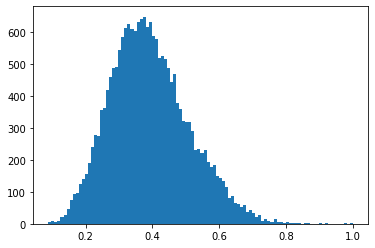

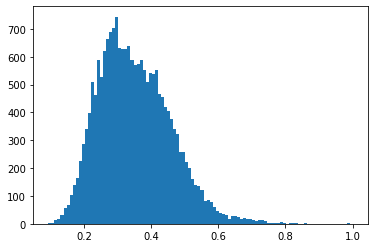

0.1499300743523946


In [95]:
d=jensenshannon_distance(filename1, fileanme2)
print(d)

In [100]:
## Correlation of distance matrices 

def distance_correlation(filename1, filename2):
    X= np.loadtxt(filename1, delimiter="\t")
    diamx = metrics.diameter(X)
    X= X/diamx

    Y= np.loadtxt(filename2, delimiter="\t")
    diamy = metrics.diameter(Y)
    Y= Y/diamy

    dX = pairwise_distances(X, metric='euclidean')
    dY = pairwise_distances(Y, metric='euclidean')

    DX = []
    DY = []
    for i in range(X.shape[0]): 
        for j in range(i+1, X.shape[0]): 
            DX.append(dX[i,j])
            DY.append(dY[i,j])

    plt.scatter(DX, DY, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)
    plt.show()
    
    corr, _ = pearsonr(DX, DY)
    print('Pearsons correlation: %.3f' % corr)
    
    return corr 
    

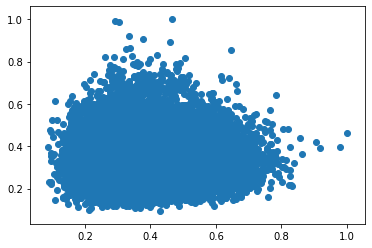

Pearsons correlation: -0.037


-0.03668961958725522

In [101]:
distance_correlation(filename1, fileanme2)

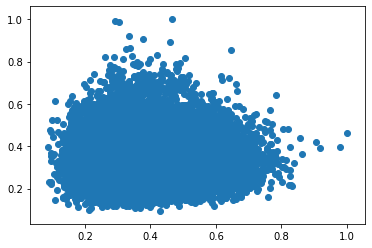

Pearsons correlation: -0.037


In [103]:
filename1 ='../results/er-c5-d16-l5-n10-p0_25-1de110b3e022445bbcffe280ac0601a8.tsv' 
filename2 = '../results/er-c5-d16-l5-n10-p0_25-4a0a27a821fe47d0a0a9c3b46c653110.tsv'

X= np.loadtxt(filename1, delimiter="\t")
diamx = metrics.diameter(X)
X= X/diamx

Y= np.loadtxt(filename2, delimiter="\t")
diamy = metrics.diameter(Y)
Y= Y/diamy

dX = pairwise_distances(X, metric='euclidean')
dY = pairwise_distances(Y, metric='euclidean')

DX = []
DY = []
for i in range(X.shape[0]): 
    for j in range(i+1, X.shape[0]): 
        DX.append(dX[i,j])
        DY.append(dY[i,j])

        
        
plt.scatter(DX, DY, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None)
plt.show()


from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(DX, DY)
print('Pearsons correlation: %.3f' % corr)   
